In [6]:
from pymatgen.ext.matproj import MPRester
import numpy as np

import matplotlib.pyplot as plt
from pymatgen.phonon.plotter import PhononBSPlotter

# Récupération de la strucuture de bandes de phonons 

<module 'matplotlib.pyplot' from '/usr/local/lib64/python3.6/site-packages/matplotlib/pyplot.py'>

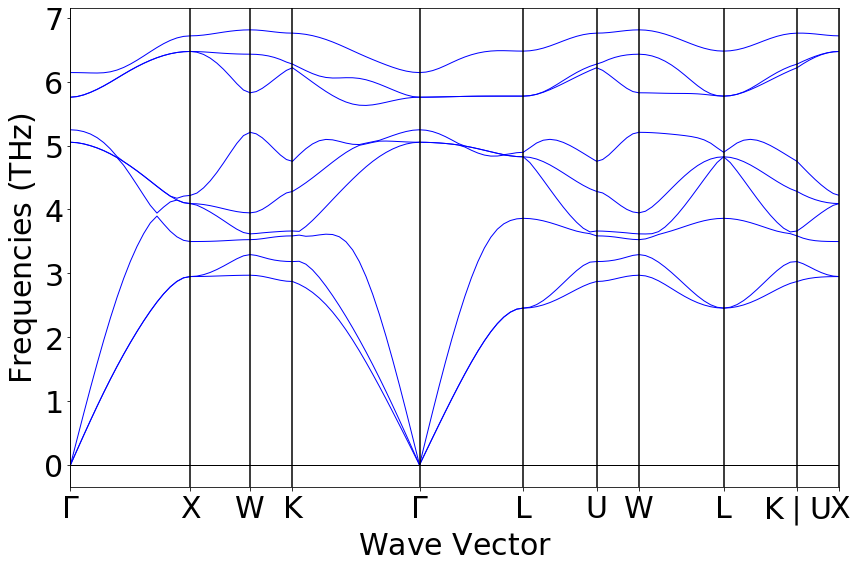

In [11]:
with MPRester("cBffMzOkc37GR0iu9dXW") as m:    
    band = m.get_phonon_bandstructure_by_material_id("mp-961713")

phonon_plot = PhononBSPlotter(band)
phonon_plot.get_plot()

# Récupération des zones de Brillouin

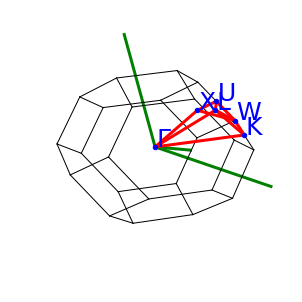

In [8]:
phonon_plot.plot_brillouin()

# Calcul de la vitesse du son pour trois branches acoustiques différentes dans trois directions différentes de la zone de Brillouin

## Bandes acoustiques 

Pour effectuer ce calcul, il faut premièrement déterminer quelles sont les bandes acoustiques parmi les bandes de phonons ci-dessus. Pour rappel, les phonons sont classés en différentes bandes de fréquences, appelées bandes acoustiques et bandes optiques. Les bandes acoustiques correspondent à celles ayant une fréquence inférieure à la fréquence de Debye; au contraire des bandes optiques ayant une fréquence supérieure à celle-ci. 

Par la suite, nous étudierons les trois premières bandes acoustiques. La première bande représentée ci-dessous en jaune, la deuxième en vert et la troisème en rouge. Elles sont définies comme étant des bandes de phonons qui ont une fréquence nulle à un vecteur d'onde nul à savoir au centre de la zone de Brillouin. 

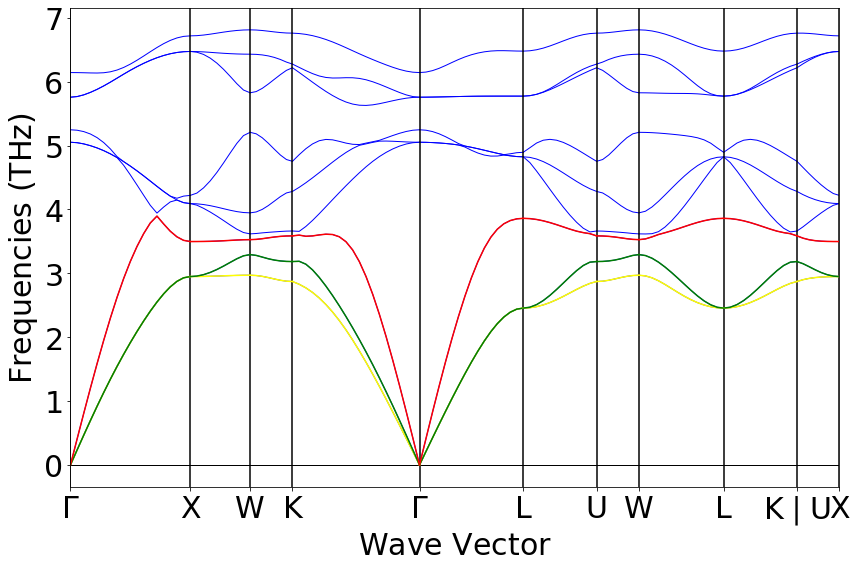

In [14]:
## Mise en évidence des trois premières bandes acoustiques ##

data = phonon_plot.bs_plot_data()
frequency = data['frequency']
distances = data['distances']
phonon_plot.get_plot()
for i in range(len(distances)): 
    plt.plot(distances[i],frequency[i][0],'yellow')  
    plt.plot(distances[i],frequency[i][1],'green')   
    plt.plot(distances[i],frequency[i][2],'red') 

## Vitesse du son

La vitesse de propagation du son est identique à la vitesse de propagation d'un phonon dans la zone de Brillouin. 

La vitesse de propagation du son est définie comme la pente de la relation de dispersion à savoir : 

$$v_s = \frac{\partial \omega}{\partial q} = 2\pi \frac{\partial f}{\partial q}$$

avec $\omega$, la relation de dispersion de notre matériau étant linéaire pour des faibles vecteurs d'ondes (c'est-à-dire des grandes longueurs d'ondes $\lambda >> a$ avec a = paramètre de maille), $q$ le vecteur d'onde et $f$ la fréquence. 

Ce matériau étant anisotrope, des changements de vitesse importants en fonction de la branche accoustique considérée peuvent être observés. 

In [9]:
## Récupération des données de notre matériau ## 

data = phonon_plot.bs_plot_data()
frequency = data['frequency']
distances = data['distances']
direction = data['ticks'].get('label')

## Première bande acoustique en jaune ##
band1 = frequency[0][0]
vitesse_1 = 2*np.pi*np.abs((band1[1]-band1[0])*(10**12))/((distances[0][1]-distances[0][0])*(10**10))
print("La vitesse de propagation du son de la première bande acoustique est dans la direction Gamma - X et vaut {} m/s.\n".format(vitesse_1))

## Deuxième bande acoustique en vert ## 
band2 = frequency[3][1]
vitesse_2 = 2*np.pi*np.abs((band1[-1]-band1[-2])*(10**12))/((distances[3][-1]-distances[3][-2])*(10**10))
print("La vitesse de propagation du son de la deuxième bande acoustique est dans la direction K - Gamma et vaut {} m/s.\n".format(vitesse_2))

## Troisième bande acoustique en rouge ## 
band3 = frequency[4][2]
vitesse_3 = 2*np.pi*np.abs((band1[1]-band1[0])*(10**12))/((distances[4][1]-distances[4][0])*(10**10))
print("La vitesse de propagation du son de la troisième bande acoustique est dans la direction Gamma - L et vaut {} m/s.\n".format(vitesse_3))

La vitesse de propagation du son de la première bande acoustique est dans la direction Gamma - X et vaut 2676.3002593380793 m/s.

La vitesse de propagation du son de la deuxième bande acoustique est dans la direction K - Gamma et vaut 221.68979965347413 m/s.

La vitesse de propagation du son de la troisième bande acoustique est dans la direction Gamma - L et vaut 2746.9558669750413 m/s.



## Représentation graphique des différentes vitesses de son calculées

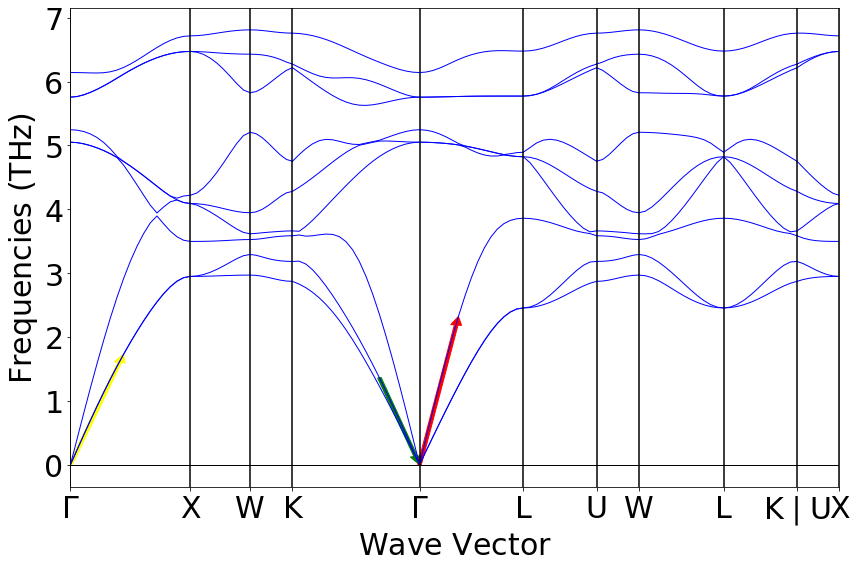

In [15]:
phonon_plot.get_plot()

## Plot de la pente 1 en jaune ##
plt.arrow(distances[0][0],band1[0],distances[0][8]-distances[0][0],band1[8]-band1[0], color='yellow',width = 0.03,length_includes_head =True)
## Plot de la pente 2 en vert ##
plt.arrow(distances[3][13],band2[13],distances[3][-1]-distances[3][13],band2[-1]-band2[13], color='green',width = 0.03,length_includes_head =True)
## Plot de la pente 3 en rouge ##
plt.arrow(distances[4][0],band3[0],distances[4][6]-distances[4][0],band3[6]-band3[0], color='red',width = 0.03,length_includes_head =True)